In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('TUANDROMD.csv')
dataset.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,1,malware
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,malware
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,malware
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,0,malware
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware


# PreProcessing 

In [3]:
dataset.shape

(4464, 242)

In [4]:
dataset.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Label                                                       0
Length: 242, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

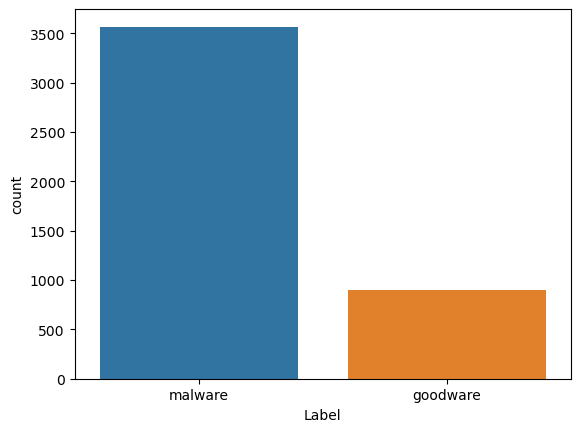

In [5]:
sns.countplot(x = 'Label', data=dataset)

In [6]:
X = dataset.iloc[:,0:-1]
y = dataset['Label']

In [7]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.02994764, -0.02994764, -0.07037559, ..., -0.39177592,
        -0.11770382,  2.37964001],
       [-0.02994764, -0.02994764, -0.07037559, ...,  2.55247948,
        -0.11770382, -0.42023163],
       [-0.02994764, -0.02994764, -0.07037559, ..., -0.39177592,
        -0.11770382, -0.42023163],
       ...,
       [-0.02994764, -0.02994764, -0.07037559, ..., -0.39177592,
        -0.11770382, -0.42023163],
       [-0.02994764, -0.02994764, -0.07037559, ..., -0.39177592,
        -0.11770382, -0.42023163],
       [-0.02994764, -0.02994764, -0.07037559, ..., -0.39177592,
        -0.11770382, -0.42023163]])

## Train Test Split

In [8]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [9]:
samples

[(      ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
  211                      0                        0   
  3672                     0                        0   
  2969                     0                        0   
  1813                     0                        0   
  2340                     0                        0   
  ...                    ...                      ...   
  1033                     0                        0   
  3264                     0                        0   
  1653                     0                        0   
  2607                     0                        0   
  2732                     0                        0   
  
        ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
  211                           0                       0   
  3672                          0                       0   
  2969                          0                       0   
  1813                          0                       0   
  2340  

## Fitness Function

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [11]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

## Iterating over the samples

In [13]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 4)
      best_C = round(C, 4)
      best_gamma = round(gamma, 4)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.9881 Best Kernel =  poly Best Nu =  1.1369 Best Epsilon =  3.1751
Best Accuracy =  0.9858 Best Kernel =  poly Best Nu =  2.5729 Best Epsilon =  9.2858
Best Accuracy =  0.9896 Best Kernel =  poly Best Nu =  1.7366 Best Epsilon =  9.8416
Best Accuracy =  0.9948 Best Kernel =  poly Best Nu =  5.3554 Best Epsilon =  7.2881
Best Accuracy =  0.9948 Best Kernel =  rbf Best Nu =  6.0369 Best Epsilon =  5.6356
Best Accuracy =  0.9955 Best Kernel =  rbf Best Nu =  5.9424 Best Epsilon =  0.2142
Best Accuracy =  0.9881 Best Kernel =  poly Best Nu =  9.2911 Best Epsilon =  6.6241
Best Accuracy =  0.9896 Best Kernel =  poly Best Nu =  3.6891 Best Epsilon =  7.352
Best Accuracy =  0.991 Best Kernel =  poly Best Nu =  1.4639 Best Epsilon =  6.2273
Best Accuracy =  0.9955 Best Kernel =  rbf Best Nu =  3.1238 Best Epsilon =  9.9324


## Result

In [14]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.9881,poly,1.1369,3.1751
1,2,0.9858,poly,2.5729,9.2858
2,3,0.9896,poly,1.7366,9.8416
3,4,0.9948,poly,5.3554,7.2881
4,5,0.9948,rbf,6.0369,5.6356
5,6,0.9955,rbf,5.9424,0.2142
6,7,0.9881,poly,9.2911,6.6241
7,8,0.9896,poly,3.6891,7.3520
8,9,0.9910,poly,1.4639,6.2273
9,10,0.9955,rbf,3.1238,9.9324


### Plotting of the Convergence Graph/Linear Curve

In [15]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [16]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [17]:
train_sizes

array([  28,   84,  141,  198,  255,  312,  368,  425,  482,  539,  596,
        652,  709,  766,  823,  880,  936,  993, 1050, 1107, 1163, 1220,
       1277, 1334, 1391, 1447, 1504, 1561, 1618, 1675, 1731, 1788, 1845,
       1902, 1959, 2015, 2072, 2129, 2186, 2243, 2299, 2356, 2413, 2470,
       2527, 2583, 2640, 2697, 2754, 2811])

In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

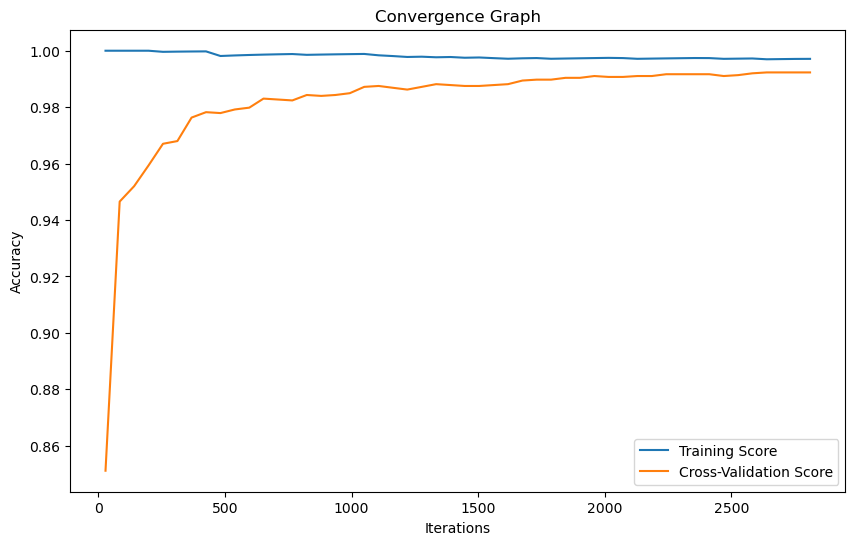

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()